In [ ]:
#!pip install tensorflow==2.14.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.14.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.14.0


In [ ]:
import sys
sys.version
#!pip install google.colab
#!pip install seaborn
#!pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement google.colab (from versions: none)
ERROR: No matching distribution found for google.colab


In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from keras.layers import Input, Average
from keras.models import Model
#from google.colab import drive

2025-11-02 21:06:24.998775: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-02 21:06:25.901224: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-02 21:06:25.901291: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-02 21:06:25.907661: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-02 21:06:26.307714: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-02 21:06:26.309471: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import tensorflow as tf
print(tf.__version__)

2025-11-02 20:28:00.231591: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-02 20:28:00.739832: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-02 20:28:00.739877: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-02 20:28:00.742973: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-02 20:28:01.049372: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-02 20:28:01.052992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

2.14.0


In [16]:
!pip install pillow

/home/kartik/Downloads/Final-20251102T143551Z-1-001/Final/tfenv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "EnsembleModel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 ResNet50V2 (Functional)     (None, 7)                    2413248   ['input_1[0][0]']             
                                                          7                                       
                                                                                                  
 ResNet101 (Functional)      (None, 7)                    4319424   ['input_1[0][0]']             
                                                          7                                       
                                                                                      

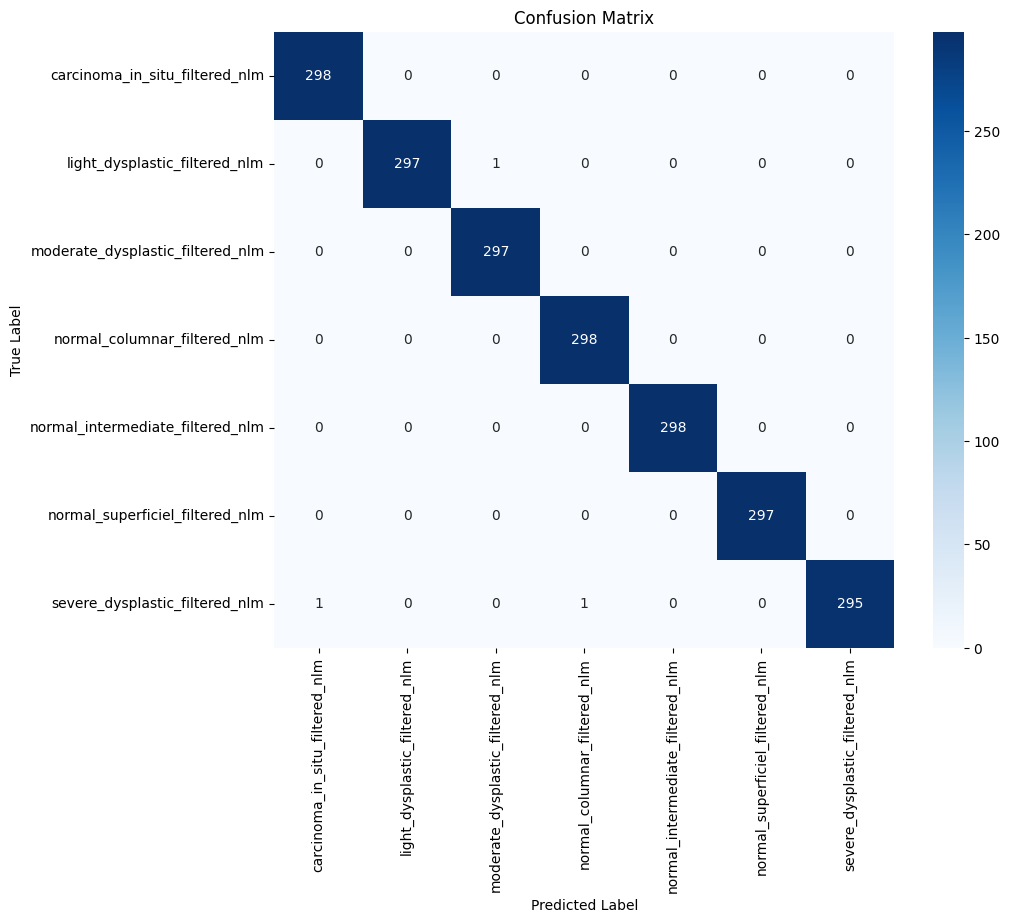

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from PIL import Image


# Load pre-trained models with unique names
model_paths = {
    "ResNet50V2": "Final Models Emsemble/Final Models Emsemble/Main Models/RestNet50_model.h5",
    "ResNet101": "Final Models Emsemble/Final Models Emsemble/Main Models/ResNet101V2_model.h5",
    "DenseNet121": "Final Models Emsemble/Final Models Emsemble/Main Models/DenseNet121.h5",
    "DenseNet169": "Final Models Emsemble/Final Models Emsemble/Main Models/DenseNet169.h5",
    "XceptionNet": "Final Models Emsemble/Final Models Emsemble/Main Models/Xception_model.h5",
}

models = {}
for name, path in model_paths.items():
    model = tf.keras.models.load_model(path, compile=False, safe_mode=False) # Add safe_mode=False
    model._name = name  # Assign unique name to prevent conflicts
    model.trainable = False  # Freeze model to prevent training
    models[name] = model

# Define ensemble model
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
outputs = [model(input_layer) for model in models.values()]
average_output = tf.keras.layers.Average(name="Ensemble_Average")(outputs)
ensemble_model = tf.keras.models.Model(inputs=input_layer, outputs=average_output, name="EnsembleModel")

# Save and load ensemble model
ensemble_model.save('last/endy.h5')

# Load the ensemble model with a different variable name
ensemble_model_loaded = tf.keras.models.load_model('last/endy.h5')

# Print model summary
ensemble_model_loaded.summary()

# Set dataset paths
data_dir = "Cervical-Cancer-Image-Classification/NEW_DATASET/"
batch_size = 1  # Test images one by one

# Load test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    data_dir + "test",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate model
y_true, y_pred = [], []
for i in range(test_generator.samples):
    img, label = next(test_generator)  # Fetch batch
    pred = ensemble_model_loaded.predict(img, verbose=0)  # Use loaded ensemble model
    y_pred.append(np.argmax(pred, axis=1)[0])  # Get predicted class
    y_true.append(np.argmax(label, axis=1)[0])  # Get true class
    print(f"\rProcessing {i + 1}/{test_generator.samples}...", end="")

# Accuracy & classification report
accuracy = accuracy_score(y_true, y_pred)
print(f"\n🔥 Overall Model Accuracy: {accuracy * 100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

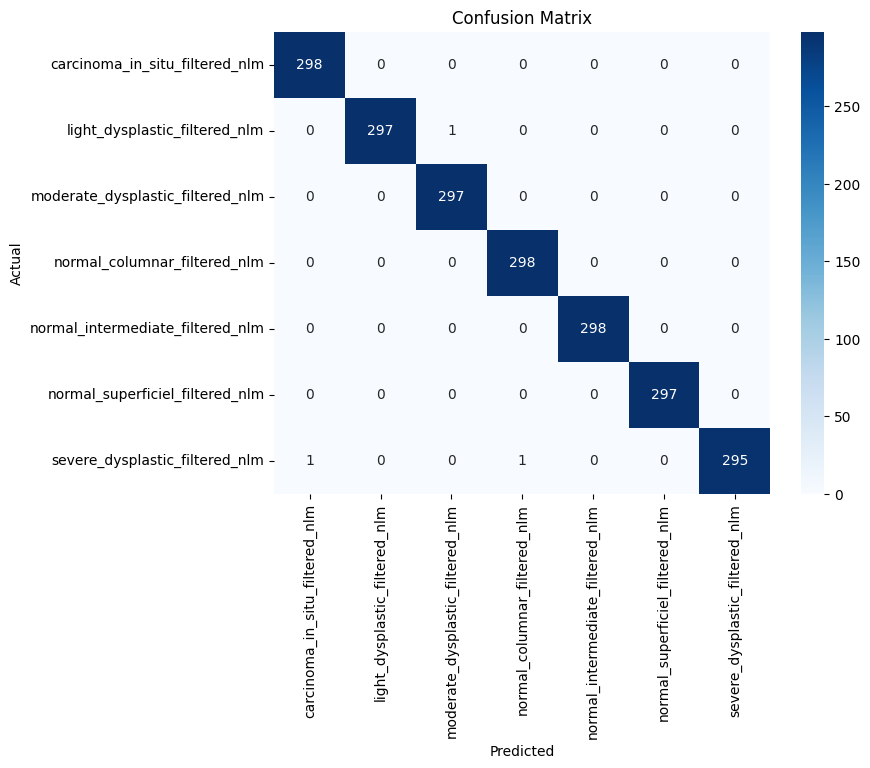

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
